<a href="https://colab.research.google.com/github/santhoshmohan8/MachineLearning/blob/main/SVM_SVC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries and download dataset from kaggle

In [23]:
# https://www.analyticsvidhya.com/blog/2021/06/support-vector-machine-better-understanding/

import pandas as pd
import numpy as np
import seaborn as sns

from google.colab import files
files.upload()
! mkdir ~/.kaggle # create directory names kaggle
! cp kaggle.json ~/.kaggle/ # copy json file to the folder kaggle
! chmod 600 ~/.kaggle/kaggle.json # change permissions

! kaggle datasets download -d vikasukani/parkinsons-disease-data-set
! unzip parkinsons-disease-data-set.zip

df = pd.read_csv("parkinsons.data")
df.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


Check the data distribution and see if any missing values

<Axes: >

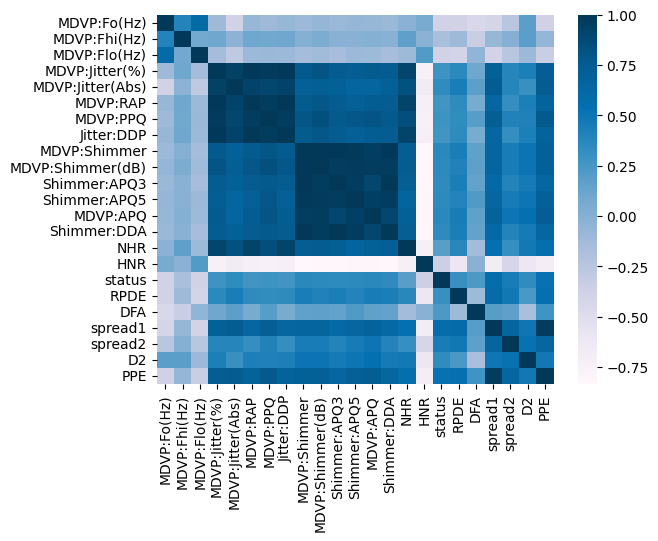

In [28]:
# data description
df.describe()
df.shape
# finding if any null values there
df.isna().sum()
# unique values in target group
df['status'].nunique()
df.status.unique()
# drop name column as this is not required
df.drop('name', axis=1, inplace=True)

# correlation between features
corr = df.corr()
sns.heatmap(corr,annot=False, cmap='PuBu')
corr[corr.lt(0.5) & corr.gt(-0.5)]

Train test split

In [30]:
# train test split
x = df.loc[:,df.columns != 'status']
y = df['status']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=22)

Feature scaling

In [31]:
#scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x_train)
ss_x_train = scaler.transform(x_train)
ss_x_test = scaler.transform(x_test)

Baseline prediction

In [39]:
from sklearn.dummy import DummyClassifier
model_DC = DummyClassifier(strategy='uniform')
model_DC.fit(ss_x_train,y_train)
pred_train_DC = model_DC.predict(ss_x_train)
pred_test_DC = model_DC.predict(ss_x_test)

SVM SVC model

In [40]:
# svm model
from sklearn import svm
model = svm.SVC()
model.fit(ss_x_train,y_train)
pred_train = model.predict(ss_x_train)
pred_test = model.predict(ss_x_test)

Hyperparameter Optimization - Finding best parameters

Note : I had just considered small no of values for CV as considering higher no of values will be computationally heavy

In [48]:
# gridsearch CV
from sklearn.model_selection import GridSearchCV
parameters = {
    'C':[0.001,0.1],
    'degree':[2],
    'gamma':[0.001,0.1],
    'kernel':['rbf','poly']
}
gscv = GridSearchCV(svm.SVC(),parameters,cv=4)
model_cv = gscv.fit(x,y)

best_params = model_cv.best_params_
print(best_params)

{'C': 0.001, 'degree': 2, 'gamma': 0.1, 'kernel': 'poly'}


Using best parameters

In [49]:
model_HP = svm.SVC(**best_params)
model_HP.fit(ss_x_train,y_train)
pred_train_HP = model_HP.predict(ss_x_train)
pred_test_HP = model_HP.predict(ss_x_test)

Comparing the performance of all 3 models ( Baseline prediction, SVC model, Hyperparameter tuned SVC model )

In [50]:
print("Accuracy score for Baseline prediction :",accuracy_score(y_test, pred_test_DC))
print("Accuracy score for SVC Model",accuracy_score(y_test, pred_test))
print("Accuracy score for Hyperparameter tuned model",accuracy_score(y_test, pred_test_HP))

Accuracy score for Baseline prediction : 0.4358974358974359
Accuracy score for SVC Model 0.7948717948717948
Accuracy score for Hyperparameter tuned model 0.6923076923076923
